In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv('../data/diabetes.csv')


# Assign column names
df.columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI',
              'DiabetesPedigreeFunction', 'Age', 'Outcome']

# Display first few rows of the dataset
print("First 5 rows of the dataset:")
print(df.head())

# Check basic information about the dataset
print("\nDataset info:")
print(df.info())

# Check for missing values
print("\nMissing values:")
print(df.isnull().sum())

# Check basic statistics
print("\nBasic statistics:")
print(df.describe())


First 5 rows of the dataset:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null  

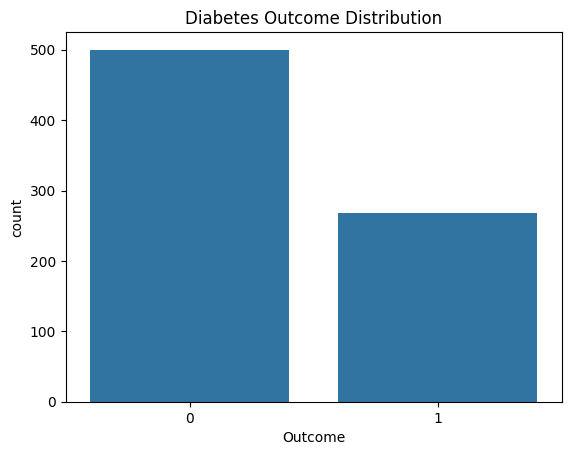

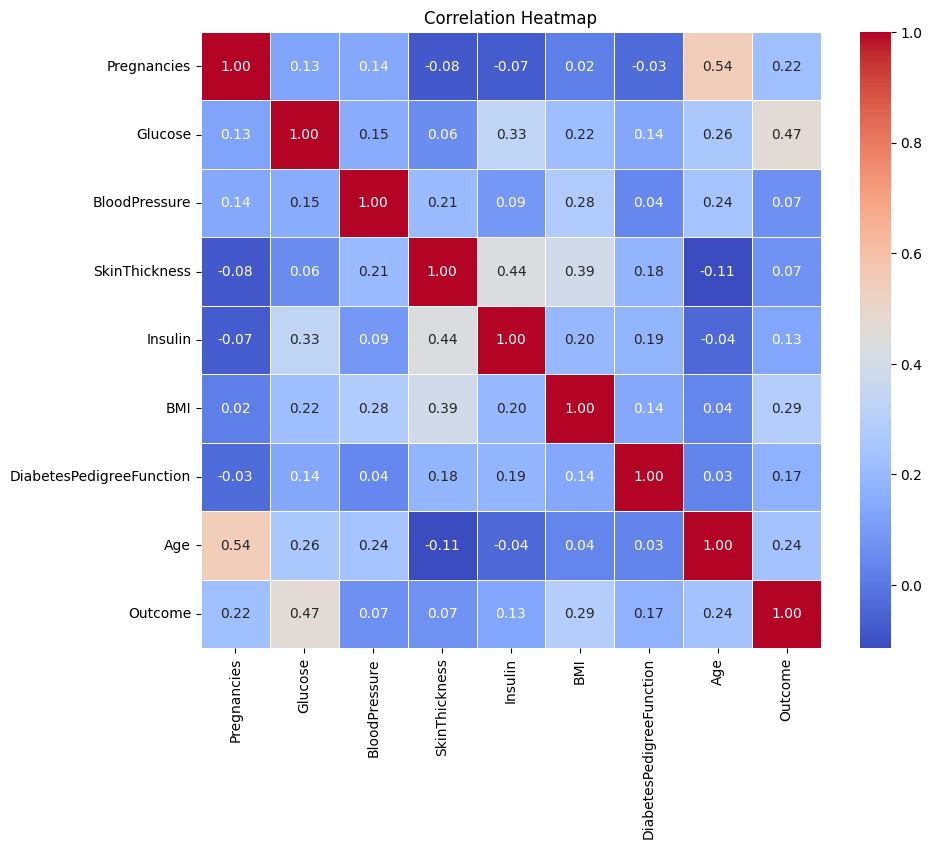

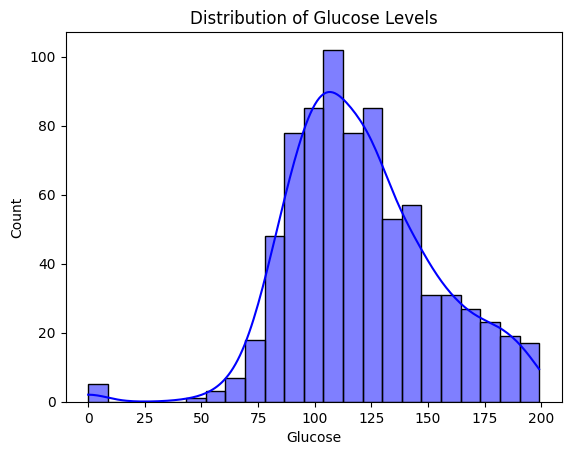

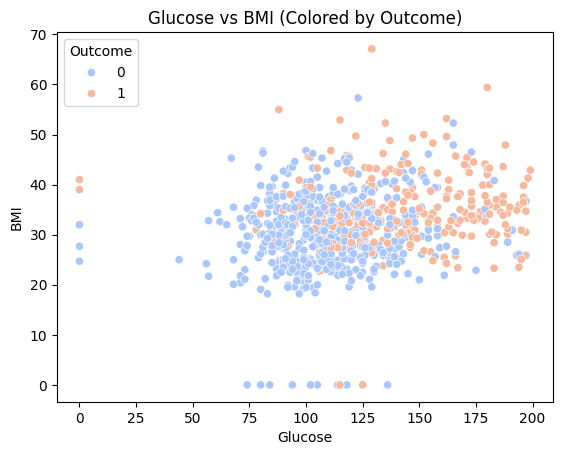

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the distribution of the 'Outcome' column (Diabetes)
sns.countplot(x='Outcome', data=df)
plt.title('Diabetes Outcome Distribution')
plt.show()

# Plot the correlation heatmap between variables
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# Visualize the distribution of Glucose levels
sns.histplot(df['Glucose'], kde=True, color='blue')
plt.title('Distribution of Glucose Levels')
plt.show()

# Scatter plot of Glucose vs BMI, colored by Outcome
sns.scatterplot(x='Glucose', y='BMI', hue='Outcome', data=df, palette='coolwarm')
plt.title('Glucose vs BMI (Colored by Outcome)')
plt.show()


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 1. Features and Target Variable
X = df.drop('Outcome', axis=1)  # Features (all columns except 'Outcome')
y = df['Outcome']  # Target variable (Outcome)

# 2. Split the Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Train a Logistic Regression Model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# 4. Predict the Results
y_pred = model.predict(X_test)

# 5. Evaluate the Model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.7467532467532467
Confusion Matrix:
[[78 21]
 [18 37]]

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.79      0.80        99
           1       0.64      0.67      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154



In [4]:
from sklearn.model_selection import train_test_split

# Features (all columns except 'Outcome')
X = df.drop('Outcome', axis=1)
# Target variable (Outcome)
y = df['Outcome']

# Split the data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Data split into training and testing sets.")


Data split into training and testing sets.


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
import joblib

# Define Logistic Regression model with more iterations
model = LogisticRegression(max_iter=2000)

# Define hyperparameters for tuning
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'penalty': ['l2'],  # Regularization type (we'll stick with 'l2')
    'solver': ['liblinear', 'saga'],  # Solvers for optimization
}

# GridSearchCV to find the best parameters
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1)
grid_search.fit(X_train, y_train)

# Get the best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best Hyperparameters:", best_params)

# Save the best model (after GridSearchCV)
joblib.dump(best_model, 'diabetes_model.pkl')

print("Model saved successfully!")


Fitting 5 folds for each of 10 candidates, totalling 50 fits


c:\Users\User\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Best Hyperparameters: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
Model saved successfully!


c:\Users\User\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
